# Temperature Prediction

Our goal is to get as accurate of a prediction of temperatures as we can.

In [1]:
# This block loads the relevant packages, and loads the data 
# into memory.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("Data.csv").as_matrix()


/home/donald/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys


In [2]:
# This block of code makes a testing, training, 
# and validation set.
# 70% of the number of rows is 14884.0999... so I rounded up.
np.random.shuffle(data)
trainnums = np.random.choice(
    data.shape[0],14885, replace = False)

# This guy makes the training set with the indices from
# trainnums.
train = data[0:14885,]

# Intermediate storage for everything that's not training data.
# Does the same things we did before to split the test and 
# training set.

test = data[14885:(14885+3189),]
val = data[(14885+3189):,]



Now that we have our three data sets we can actually get straight into some prediction, since this data is conveniently all numeric and therefore doesn't require munging. We are also going to forget about our validation set for a while and our test set for even longer.

In [3]:
# This block separates the training set into features and 
# Y's, then does some linear regression.
Y = train[:,len(train[1,])-1]
X = train[:,0:81]
dummy = np.ones(len(X)).T
# Does the transformations on X.
Phi = np.column_stack((dummy,X, X**2, X**3, X**4,X**5,X**6))

# Solves for the coefficients.
w = np.linalg.inv(Phi.T.dot(Phi)).dot(Phi.T).dot(Y)

# R-squared is cool.
R2 = 1 - (Y-Phi.dot(w)).T.dot(Y-Phi.dot(w))/(
    Y-np.mean(Y)).T.dot(Y-np.mean(Y))


Now we are going to remember that we have a validation set and try to use it to make our model predict things that it doesn't know about better. You can tell from that last sentence that I English well.

In [4]:
Yval = val[:,len(val[1,])-1]
Xval = val[:,0:81]
dummyval = np.ones(len(Xval)).T
Phival = np.column_stack((dummyval, Xval, Xval**2,Xval**3,Xval**4,Xval**5,Xval**6))

Err = abs(Yval - Phival.dot(w))/Yval
print(np.mean(Err))
np.median(Err)

18.104396975618116


0.3341145046469428

In [5]:
# This block separates the training set into features and 
# Y's, then does some linear regression.
Y = train[:,len(train[1,])-1]
X = train[:,0:81]
dummy = np.ones(len(X)).T
# Does the transformations on X.
Phi = np.column_stack((dummy,X))

# Solves for the coefficients.
w = np.linalg.inv(Phi.T.dot(Phi)).dot(Phi.T).dot(Y)

# R-squared is cool.
R2 = 1 - (Y-Phi.dot(w)).T.dot(Y-Phi.dot(w))/(
    Y-np.mean(Y)).T.dot(Y-np.mean(Y))

Yval = val[:,len(val[1,])-1]
Xval = val[:,0:81]
dummyval = np.ones(len(Xval)).T
Phival = np.column_stack((dummyval, Xval))

Err = abs(Yval - Phival.dot(w))/Yval
print(np.mean(Err))
np.median(np.absolute(Err))

25.092902416799067


0.4142566417565441

In [6]:
# This block separates the training set into features and 
# Y's, then does some linear regression.
Y = train[:,len(train[1,])-1]
X = train[:,0:81]
dummy = np.ones(len(X)).T
# Does the transformations on X.
Phi = np.column_stack((dummy,X,X**2))

# Solves for the coefficients.
w = np.linalg.inv(Phi.T.dot(Phi)).dot(Phi.T).dot(Y)

# R-squared is cool.
R2 = 1 - (Y-Phi.dot(w)).T.dot(Y-Phi.dot(w))/(
    Y-np.mean(Y)).T.dot(Y-np.mean(Y))

Yval = val[:,len(val[1,])-1]
Xval = val[:,0:81]
dummyval = np.ones(len(Xval)).T
Phival = np.column_stack((dummyval, Xval,Xval**2))

Err = abs(Yval - Phival.dot(w))/Yval
print(np.mean(Err))
np.median(np.absolute(Err))

33.056300580772614


0.39370041323987487

In [7]:
# This block separates the training set into features and 
# Y's, then does some linear regression.
Y = train[:,len(train[1,])-1]
X = train[:,0:81]
dummy = np.ones(len(X)).T
# Does the transformations on X.
Phi = np.column_stack((dummy,X,X**3))

# Solves for the coefficients.
w = np.linalg.inv(Phi.T.dot(Phi)).dot(Phi.T).dot(Y)

# R-squared is cool.
R2 = 1 - (Y-Phi.dot(w)).T.dot(Y-Phi.dot(w))/(
    Y-np.mean(Y)).T.dot(Y-np.mean(Y))

Yval = val[:,len(val[1,])-1]
Xval = val[:,0:81]
dummyval = np.ones(len(Xval)).T
Phival = np.column_stack((dummyval, Xval,Xval**3))

Err = abs(Yval - Phival.dot(w))/Yval
print(np.mean(Err))
np.median(np.absolute(Err))

33.51631308911738


0.39958362938863895

In [8]:
# This block separates the training set into features and 
# Y's, then does some linear regression.
Y = train[:,len(train[1,])-1]
X = train[:,0:81]
dummy = np.ones(len(X)).T
# Does the transformations on X.
Phi = np.column_stack((dummy,X,np.sin(X)))

# Solves for the coefficients.
w = np.linalg.inv(Phi.T.dot(Phi)).dot(Phi.T).dot(Y)

# R-squared is cool.
R2 = 1 - (Y-Phi.dot(w)).T.dot(Y-Phi.dot(w))/(
    Y-np.mean(Y)).T.dot(Y-np.mean(Y))

Yval = val[:,len(val[1,])-1]
Xval = val[:,0:81]
dummyval = np.ones(len(Xval)).T
Phival = np.column_stack((dummyval, Xval, np.sin(Xval)))

Err = abs(Yval - Phival.dot(w))/Yval
print(np.mean(Err))
np.median(np.absolute(Err))

19.218956854198876


0.38455985649024277

In [9]:
# This block separates the training set into features and 
# Y's, then does some linear regression.
Y = train[:,len(train[1,])-1]
X = train[:,0:81]
dummy = np.ones(len(X)).T
# Does the transformations on X.
Phi = np.column_stack((dummy,X,X**2,np.sin(X)))

# Solves for the coefficients.
w = np.linalg.inv(Phi.T.dot(Phi)).dot(Phi.T).dot(Y)

# R-squared is cool.
R2 = 1 - (Y-Phi.dot(w)).T.dot(Y-Phi.dot(w))/(
    Y-np.mean(Y)).T.dot(Y-np.mean(Y))

Yval = val[:,len(val[1,])-1]
Xval = val[:,0:81]
dummyval = np.ones(len(Xval)).T
Phival = np.column_stack((dummyval, Xval,Xval**2, np.sin(Xval)))

Err = abs(Yval - Phival.dot(w))/Yval
print(np.mean(Err))
np.median(np.absolute(Err))

21.7686080954698


0.36718242239903776

In [10]:
# This block separates the training set into features and 
# Y's, then does some linear regression.
Y = train[:,len(train[1,])-1]
X = train[:,0:81]
dummy = np.ones(len(X)).T
# Does the transformations on X.
Phi = np.column_stack((dummy,X,X**2,X**3,np.sin(X),np.cos(X)))

# Solves for the coefficients.
w = np.linalg.inv(Phi.T.dot(Phi)).dot(Phi.T).dot(Y)

# R-squared is cool.
R2 = 1 - (Y-Phi.dot(w)).T.dot(Y-Phi.dot(w))/(
    Y-np.mean(Y)).T.dot(Y-np.mean(Y))

Yval = val[:,len(val[1,])-1]
Xval = val[:,0:81]
dummyval = np.ones(len(Xval)).T
Phival = np.column_stack((dummyval, Xval,Xval**2,Xval**3, np.sin(Xval),np.cos(Xval)))

Err = abs(Yval - Phival.dot(w))/Yval
print(np.mean(Err))
np.median(np.absolute(Err))

29.781161303207057


0.35910994639728205

In [11]:
# This block separates the training set into features and 
# Y's, then does some linear regression.
Y = train[:,len(train[1,])-1]
X = train[:,0:81]
dummy = np.ones(len(X)).T
# Does the transformations on X.
Phi = np.column_stack((dummy,X,X**2,X**3,np.sin(X),np.cos(X),np.sin(X**2)))

# Solves for the coefficients.
w = np.linalg.inv(Phi.T.dot(Phi)).dot(Phi.T).dot(Y)

# R-squared is cool.
R2 = 1 - (Y-Phi.dot(w)).T.dot(Y-Phi.dot(w))/(
    Y-np.mean(Y)).T.dot(Y-np.mean(Y))

Yval = val[:,len(val[1,])-1]
Xval = val[:,0:81]
dummyval = np.ones(len(Xval)).T
Phival = np.column_stack((dummyval, Xval,Xval**2,Xval**3, np.sin(Xval),np.cos(Xval),np.sin(Xval**2)))

Err = abs(Yval - Phival.dot(w))/Yval
print(np.mean(Err))
np.median(np.absolute(Err))

24.795320825123824


0.35010327820549464

In [12]:
# This block separates the training set into features and 
# Y's, then does some linear regression.
Y = train[:,len(train[1,])-1]
X = train[:,0:81]
dummy = np.ones(len(X)).T
# Does the transformations on X.
Phi = np.column_stack((dummy,X,X**2,X**3,X**4,X**5))

# Solves for the coefficients.
w = np.linalg.inv(Phi.T.dot(Phi)).dot(Phi.T).dot(Y)

# R-squared is cool.
R2 = 1 - (Y-Phi.dot(w)).T.dot(Y-Phi.dot(w))/(
    Y-np.mean(Y)).T.dot(Y-np.mean(Y))

Yval = val[:,len(val[1,])-1]
Xval = val[:,0:81]
dummyval = np.ones(len(Xval)).T
Phival = np.column_stack((dummyval, Xval,Xval**2,Xval**3, Xval**4,Xval**5))

Err = abs(Yval - Phival.dot(w))/Yval
print(np.median(np.absolute(Err)))

0.33924234859904345


In [13]:
# This block separates the training set into features and 
# Y's, then does some linear regression.
Y = train[:,len(train[1,])-1]
X = train[:,0:81]
dummy = np.ones(len(X)).T
# Does the transformations on X.
Phi = np.column_stack((dummy,X,X**2,X**3,np.sin(X)))

# Solves for the coefficients.
w = np.linalg.inv(Phi.T.dot(Phi)).dot(Phi.T).dot(Y)

# R-squared is cool.
R2 = 1 - (Y-Phi.dot(w)).T.dot(Y-Phi.dot(w))/(
    Y-np.mean(Y)).T.dot(Y-np.mean(Y))

Yval = val[:,len(val[1,])-1]
Xval = val[:,0:81]
dummyval = np.ones(len(Xval)).T
Phival = np.column_stack((dummyval, Xval,Xval**2,Xval**3, np.sin(Xval)))

Err = abs(Yval - Phival.dot(w))/Yval
print(np.mean(Err))
np.median(np.absolute(Err))

28.204985813738897


0.3542186564050364

In [14]:
# This block separates the training set into features and 
# Y's, then does some linear regression.
Y = train[:,len(train[1,])-1]
X = train[:,0:81]
dummy = np.ones(len(X)).T
# Does the transformations on X.
Phi = np.column_stack((dummy,X,X**2,X**3,X**4))

# Solves for the coefficients.
w = np.linalg.inv(Phi.T.dot(Phi)).dot(Phi.T).dot(Y)

# R-squared is cool.
R2 = 1 - (Y-Phi.dot(w)).T.dot(Y-Phi.dot(w))/(
    Y-np.mean(Y)).T.dot(Y-np.mean(Y))

Yval = val[:,len(val[1,])-1]
Xval = val[:,0:81]
dummyval = np.ones(len(Xval)).T
Phival = np.column_stack((dummyval, Xval,Xval**2,Xval**3,Xval**4))

Err = abs(Yval - Phival.dot(w))/Yval
print(np.mean(Err))
np.median(np.absolute(Err))

23.13838415746703


0.34896233315678604

So clearly we've gone too far. Going back to the best model we had previously and regularizing we get:

In [15]:
# This block separates the training set into features and 
# Y's, then does some linear regression.
Y = train[:,len(train[1,])-1]
X = train[:,0:81]
dummy = np.ones(len(X)).T
# Does the transformations on X.
Phi = np.column_stack((dummy,X,X**2,X**3,X**4,X**5,X**6))

Errvec = list()
for i in range(100):
    lamda = i*.001*np.identity(1+6*81)
    # Solves for the coefficients.
    w = np.linalg.inv(Phi.T.dot(Phi)+lamda).dot(Phi.T).dot(Y)

    Yval = val[:,len(val[1,])-1]
    Xval = val[:,0:81]
    dummyval = np.ones(len(Xval)).T
    Phival = np.column_stack((dummyval, Xval, Xval**2,Xval**3,Xval**4,Xval**5,Xval**6))

    Err = abs(Yval - Phival.dot(w))/Yval
    Errvec.append([i,np.median(Err)])

# print(min(Errvec[:,1]))
Errvec = np.array(Errvec)
print(Errvec[:,1].argmin())

4


In [16]:
Errvec = np.array(Errvec)
print(Errvec[Errvec[:,1].argmin(),1])
Errvec[:,1].argmin()


0.33355157279685244


4

So it looks like we've reached the best my models can do. After much ado, we finally get to the part that we've been waiting for! Using the test data.

In [17]:
# This block separates the training set into features and 
# Y's, then does some linear regression.
Y = train[:,len(train[1,])-1]
X = train[:,0:81]
dummy = np.ones(len(X)).T
# Does the transformations on X.
Phi = np.column_stack((dummy,X,X**2,X**3,X**4,X**5,X**6))

# Solves for the coefficients.
w = np.linalg.inv(Phi.T.dot(Phi)+Errvec[:,1].argmin()*.001*np.identity(1+6*81)).dot(Phi.T).dot(Y)

# R-squared is cool.
R2 = 1 - (Y-Phi.dot(w)).T.dot(Y-Phi.dot(w))/(
    Y-np.mean(Y)).T.dot(Y-np.mean(Y))

Ytest = test[:,len(test[1,])-1]
Xtest = test[:,0:81]
dummytest = np.ones(len(Xtest)).T
Phitest = np.column_stack((dummytest, Xtest,Xtest**2,Xtest**3, Xtest**4,Xtest**5,Xtest**6))

MRAErr = np.median(np.absolute(Ytest - Phitest.dot(w))/Ytest)
print(np.mean(Ytest - Phitest.dot(w)))
print(np.max(Ytest - Phitest.dot(w)))
print(MRAErr)



-0.21142683239991872
82.10650707691012
0.34135634727996633


Let's make some pictures for the presentation!

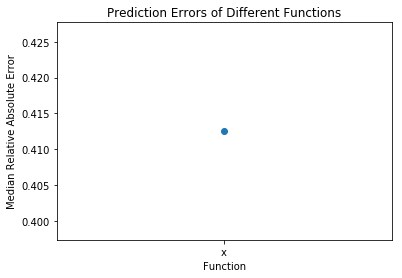

In [18]:
plotstuff = [['x',0.41252379612708473],['x+x^2',.4047393127389217]
             ,['x+x^3',0.37837191130007386],['x+sin(x)',0.38524005015422524]
             ,['x+x^2+sin(x)',0.3897316474310113],['x+x^2+x^3+sin(x)',0.3650651647724997]
             ,['x+x^2+x^3+sin(x)+cos(x)',0.3738883552367521],['x+x^2+x^3+x^4',0.3648276002862168]
             ,["x+x^2+x^3+x^4+x^5",.3633147515003524],["x+x^2+x^3+x^4+x^5+x^6",0.3498417509999737]]

p1 = plt.figure()
plt.scatter(plotstuff[0][0],plotstuff[0][1])
plt.xlabel("Function")
plt.ylabel("Median Relative Absolute Error")
plt.title("Prediction Errors of Different Functions")
plt.show()
p1.savefig('p1', bbox_inches = 'tight')


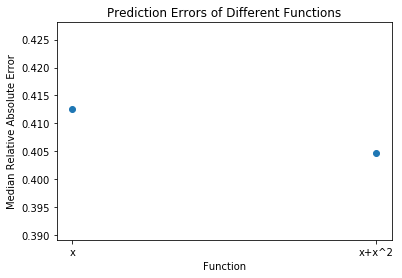

In [19]:

arr = np.array(plotstuff)
x = arr[:,0]
y = arr[:,1].astype(float)

p2 = plt.figure()
plt.scatter(x[0:2],y[0:2])
plt.xlabel("Function")
plt.ylabel("Median Relative Absolute Error")
plt.title("Prediction Errors of Different Functions")
plt.show()
p2.savefig('p2', bbox_inches = 'tight')

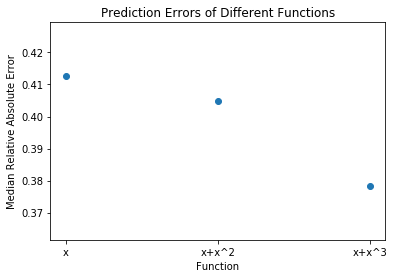

In [20]:
p3 = plt.figure()
plt.scatter(x[0:3],y[0:3])
plt.xlabel("Function")
plt.ylabel("Median Relative Absolute Error")
plt.title("Prediction Errors of Different Functions")
plt.show()
p3.savefig('p3', bbox_inches = 'tight')

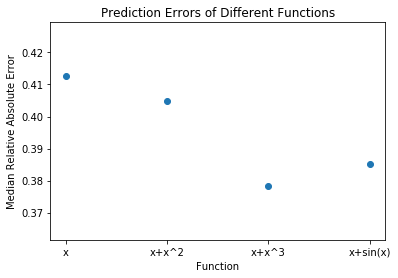

In [21]:
p4 = plt.figure()
plt.scatter(x[0:4],y[0:4])
plt.xlabel("Function")
plt.ylabel("Median Relative Absolute Error")
plt.title("Prediction Errors of Different Functions")
plt.show()
p4.savefig('p4', bbox_inches = 'tight')

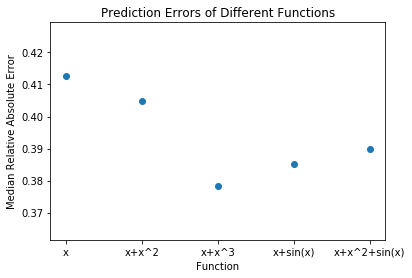

In [22]:
p5 = plt.figure()
plt.scatter(x[0:5],y[0:5])
plt.xlabel("Function")
plt.ylabel("Median Relative Absolute Error")
plt.title("Prediction Errors of Different Functions")
plt.show()
p5.savefig('p5', bbox_inches = 'tight')

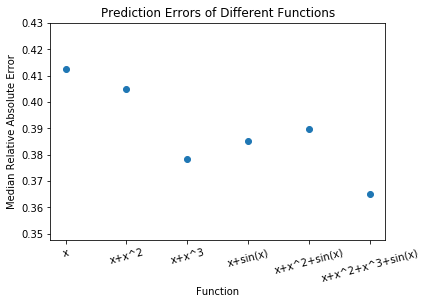

In [23]:
p6 = plt.figure()
plt.xticks(rotation=15)
plt.scatter(x[0:6],y[0:6])
plt.xlabel("Function")
plt.ylabel("Median Relative Absolute Error")
plt.title("Prediction Errors of Different Functions")
plt.show()
p6.savefig('p6', bbox_inches = 'tight')

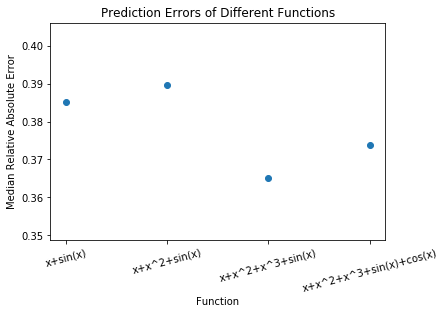

In [24]:
p7 = plt.figure()
plt.xticks(rotation = 15)
plt.scatter(x[3:7],y[3:7])
plt.xlabel("Function")
plt.ylabel("Median Relative Absolute Error")
plt.title("Prediction Errors of Different Functions")
plt.show()
p7.savefig('p7', bbox_inches = 'tight')

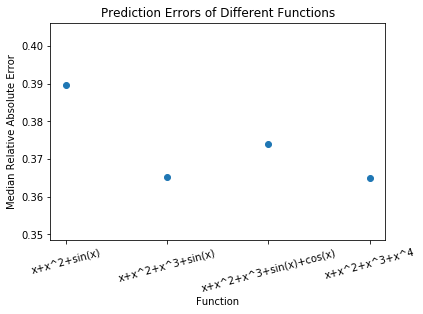

In [25]:
p8 = plt.figure()
plt.xticks(rotation = 15)
plt.scatter(x[4:8],y[4:8])
plt.xlabel("Function")
plt.ylabel("Median Relative Absolute Error")
plt.title("Prediction Errors of Different Functions")
plt.show()
p8.savefig('p8', bbox_inches = 'tight')

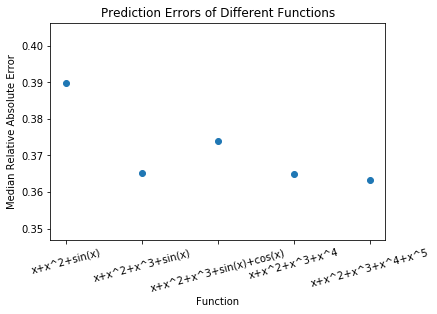

In [26]:
p9 = plt.figure()
plt.xticks(rotation = 15)
plt.scatter(x[4:9],y[4:9])
plt.xlabel("Function")
plt.ylabel("Median Relative Absolute Error")
plt.title("Prediction Errors of Different Functions")
plt.show()
p9.savefig('p9', bbox_inches = 'tight')

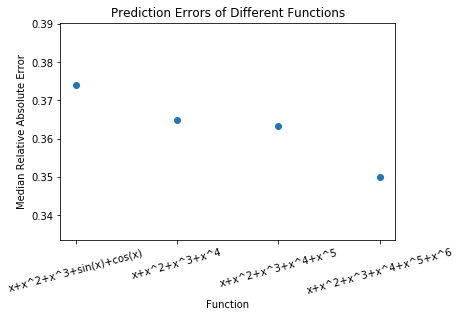

In [27]:
p10 = plt.figure()
plt.xticks(rotation = 15)
plt.scatter(x[6:10],y[6:10])
plt.xlabel("Function")
plt.ylabel("Median Relative Absolute Error")
plt.title("Prediction Errors of Different Functions")
plt.show()
p10.savefig('p10', bbox_inches = 'tight')

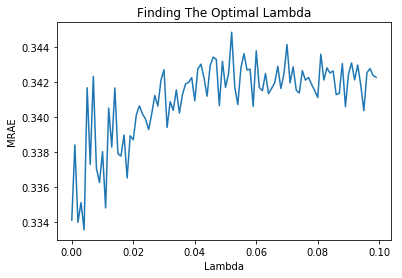

In [28]:
reg = plt.figure()
plt.plot(Errvec[:,0]*.001,Errvec[:,1])
plt.xlabel("Lambda")
plt.ylabel("MRAE")
plt.title("Finding The Optimal Lambda")
plt.show()
reg.savefig('reg')

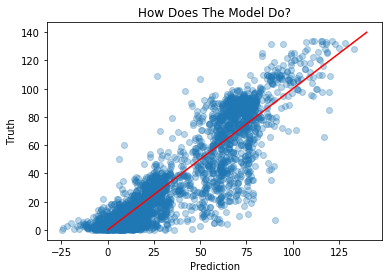

In [29]:
ys = plt.figure()
plt.scatter(Phitest.dot(w),Ytest, alpha = .3)
plt.plot(np.linspace(0,140,10),np.linspace(0,140,10), color = "red")
plt.xlabel("Prediction")
plt.ylabel("Truth")
plt.title("How Does The Model Do?")
plt.show()
ys.savefig('ys')

0.676951140461945


/home/donald/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: RuntimeWarning: divide by zero encountered in true_divide


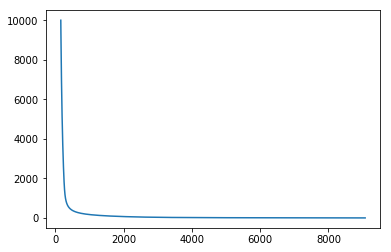

In [25]:
# This block separates the training set into features and 
# Y's, then does some linear regression.
Y = train[:,len(train[1,])-1]
X = train[:,0:81]
dummy = np.ones(len(X)).T
# Does the transformations on X.
X = (X - X.min(0))/(X.max(0) - X.min(0))
Y = (Y - Y.min(0))/(Y.max(0) - Y.min(0))
Phi = np.column_stack((dummy,X))
w = np.random.randn(len(Phi[1,]),1)

# Phi = Phi - Phi.min()

# w - Phi.T@(Phi@w - Y)
# Phi@w
np.shape(Phi)
Y = np.reshape(Y,(14885,1))
Y.shape
Yval = val[:,len(val[1,])-1]
Xval = val[:,0:81]
newdum = np.ones(len(Xval)).T
Xval = (Xval - Xval.min(0))/(Xval.max(0) - Xval.min(0))
Yval = (Yval - Yval.min(0))/(Yval.max(0) - Yval.min(0))
Yval = np.reshape(Yval,(len(Yval),1))
Phival = np.column_stack((newdum,Xval))
Errs = []
ivec = []
Phival.shape
Yval.shape
for i in range(10000):
    w = w - (1/210000)*Phi.T@(Phi@w - Y)
    Errs.append(float((Yval - Phival@w).T@(Yval - Phival@w)))
    ivec.append(i)

Errs

MRAE = np.median(np.absolute(Yval - Phival@w)/np.absolute(Yval))
print(MRAE)
plt.plot(Errs,ivec)

1.2304024250308359


/home/donald/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: RuntimeWarning: divide by zero encountered in true_divide


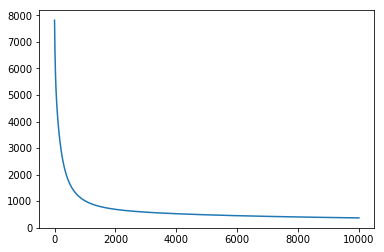

In [29]:
# This block separates the training set into features and 
# Y's, then does some linear regression.
Y = train[:,len(train[1,])-1]
X = train[:,0:81]
dummy = np.ones(len(X)).T
# Does the transformations on X.
X = (X - X.min(0))/(X.max(0) - X.min(0))
Y = (Y - Y.min(0))/(Y.max(0) - Y.min(0))
Phi = np.column_stack((dummy,X,np.sin(X)))
r = np.random.randn(len(Phi[1,]),1)

# Phi = Phi - Phi.min()

# w - Phi.T@(Phi@w - Y)
# Phi@w
np.shape(Phi)
Y = np.reshape(Y,(14885,1))

Yval = val[:,len(val[1,])-1]
Xval = val[:,0:81]
newdum = np.ones(len(Xval)).T
Xval = (Xval - Xval.min(0))/(Xval.max(0) - Xval.min(0))
Yval = (Yval - Yval.min(0))/(Yval.max(0) - Yval.min(0))
Yval = np.reshape(Yval,(len(Yval),1))
Phival = np.column_stack((newdum,Xval,np.sin(Xval)))
lr = .000000999999999999
MRAEbest = 1000

w = r
Errs = []
ivec = []
for i in range(10000):
    w = w - (lr)*Phi.T@(Phi@w - Y)
    Errs.append(float((Yval - Phival@w).T@(Yval - Phival@w)))
    ivec.append(i)
    
MRAE = np.median(np.absolute(Yval - Phival@w)/np.absolute(Yval))
print(MRAE)
plt.plot(ivec,Errs)

In [223]:
MRAE

1.340970777753537

2.5505448461866296


/home/donald/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in true_divide


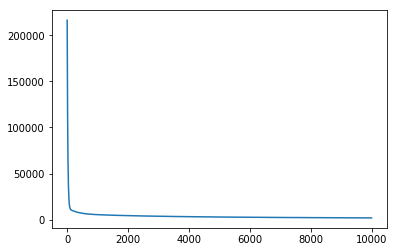

In [38]:
# This block separates the training set into features and 
# Y's, then does some linear regression.
Y = train[:,len(train[1,])-1]
X = train[:,0:81]
dummy = np.ones(len(X)).T
# Does the transformations on X.
X = (X - X.min(0))/(X.max(0) - X.min(0))
Y = (Y - Y.min(0))/(Y.max(0) - Y.min(0))
Phi = np.column_stack((dummy,X,X**2))
w = np.random.randn(len(Phi[1,]),1)

# Phi = Phi - Phi.min()

# w - Phi.T@(Phi@w - Y)
# Phi@w
np.shape(Phi)
Y = np.reshape(Y,(14885,1))

Yval = val[:,len(val[1,])-1]
Xval = val[:,0:81]
newdum = np.ones(len(Xval)).T
Xval = (Xval - Xval.min(0))/(Xval.max(0) - Xval.min(0))
Yval = (Yval - Yval.min(0))/(Yval.max(0) - Yval.min(0))
Yval = np.reshape(Yval,(len(Yval), 1))
Phival = np.column_stack((newdum,Xval,Xval**2))

Errs = []
ivec = []
for i in range(10000):
    w = w - .00000009*Phi.T@(Phi@w - Y)
    Errs.append(float((Yval - Phival@w).T@(Yval - Phival@w)))
    ivec.append(i)
MRAE = np.median(np.absolute(Yval - Phival@w)/np.absolute(Yval))
print(MRAE)
plt.plot(ivec,Errs)

In [226]:
# This block separates the training set into features and 
# Y's, then does some linear regression.
Y = train[:,len(train[1,])-1]
X = train[:,0:81]
dummy = np.ones(len(X)).T
# Does the transformations on X.
X = (X - X.min(0))/(X.max(0) - X.min(0))
Y = (Y - Y.min(0))/(Y.max(0) - Y.min(0))
Phi = np.column_stack((dummy,X,X**3))
w = np.random.randn(len(Phi[1,]),1)

# Phi = Phi - Phi.min()

# w - Phi.T@(Phi@w - Y)
# Phi@w
np.shape(Phi)
Y = np.reshape(Y,(14885,1))

for i in range(10000):
    w = w - .0000001*Phi.T@(Phi@w - Y)

Yval = val[:,len(val[1,])-1]
Xval = val[:,0:81]
newdum = np.ones(len(Xval)).T
Xval = (Xval - Xval.min(0))/(Xval.max(0) - Xval.min(0))
Yval = (Yval - Yval.min(0))/(Yval.max(0) - Yval.min(0))
Phival = np.column_stack((newdum,Xval,Xval**3))
MRAE = np.median(np.absolute(Yval - Phival@w)/np.absolute(Yval))
print(MRAE)

2.383622875731353


/home/donald/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in true_divide


In [178]:
# This block separates the training set into features and 
# Y's, then does some linear regression.
Y = train[:,len(train[1,])-1]
X = train[:,0:81]
dummy = np.ones(len(X)).T
# Does the transformations on X.
X = (X - X.min(0))/(X.max(0) - X.min(0))
Y = (Y - Y.min(0))/(Y.max(0) - Y.min(0))
Phi = np.column_stack((dummy,X,np.sin(X),np.cos(X)))
w = np.random.randn(len(Phi[1,]),1)

# Phi = Phi - Phi.min()

# w - Phi.T@(Phi@w - Y)
# Phi@w
np.shape(Phi)
Y = np.reshape(Y,(14885,1))

for i in range(10000):
    w = w - (1/210000)*Phi.T@(Phi@w - Y)

Yval = val[:,len(val[1,])-1]
Xval = val[:,0:81]
newdum = np.ones(len(Xval)).T
Xval = (Xval - Xval.min(0))/(Xval.max(0) - Xval.min(0))
Yval = (Yval - Yval.min(0))/(Yval.max(0) - Yval.min(0))
Phival = np.column_stack((newdum,Xval,np.sin(Xval),np.cos(Xval)))
MRAE = np.median(np.absolute(Yval - Phival@w)/np.absolute(Yval))
print(MRAE)

nan


/home/donald/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in true_divide


In [227]:
# This block separates the training set into features and 
# Y's, then does some linear regression.
Y = train[:,len(train[1,])-1]
X = train[:,0:81]
dummy = np.ones(len(X)).T
# Does the transformations on X.
X = (X - X.min(0))/(X.max(0) - X.min(0))
Y = (Y - Y.min(0))/(Y.max(0) - Y.min(0))
Phi = np.column_stack((dummy,X,np.sin(X)))
w = np.random.randn(len(Phi[1,]),1)

# Phi = Phi - Phi.min()

# w - Phi.T@(Phi@w - Y)
# Phi@w
np.shape(Phi)
Y = np.reshape(Y,(14885,1))

for i in range(10000):
    w = w - .0000001*Phi.T@(Phi@w - Y)

Yval = val[:,len(val[1,])-1]
Xval = val[:,0:81]
newdum = np.ones(len(Xval)).T
Xval = (Xval - Xval.min(0))/(Xval.max(0) - Xval.min(0))
Yval = (Yval - Yval.min(0))/(Yval.max(0) - Yval.min(0))
Phival = np.column_stack((newdum,Xval,np.sin(Xval)))
MRAE = np.median(np.absolute(Yval - Phival@w)/np.absolute(Yval))
print(MRAE)

2.545430711565563


/home/donald/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in true_divide


0.49558934410131483


/home/donald/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in true_divide


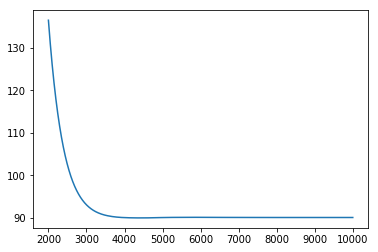

In [59]:
w = np.random.randn(len(Phi[1,]),1)
Yval = val[:,len(val[1,])-1]
Xval = val[:,0:81]
newdum = np.ones(len(Xval)).T
Xval = (Xval - Xval.min(0))/(Xval.max(0) - Xval.min(0))
Yval = (Yval - Yval.min(0))/(Yval.max(0) - Yval.min(0))
Phival = np.column_stack((newdum,Xval,np.sin(Xval)))
Yval = np.reshape(Yval,(len(Yval),1))
Errs = []
ivec = []
bestErr = 10000
wbest = []
for i in range(10000):
    w = w - (1/210000)*Phi.T@(Phi@w - Y) - .000001*np.sign(w) - .001*w
    Errs.append(float((Yval - Phival@w).T@(Yval - Phival@w)))
    if(Errs[i]<bestErr):
        wbest = w
    ivec.append(i)
    

MRAE = np.median(np.absolute(Yval - Phival@wbest)/np.absolute(Yval))
print(MRAE)
plt.plot(ivec[2000:],Errs[2000:])

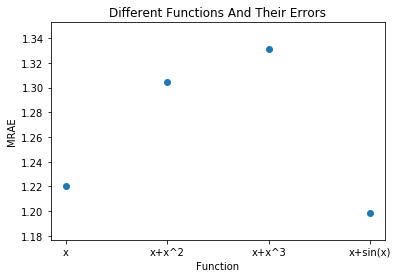

In [196]:
graphs = ['x','x+x^2','x+x^3','x+sin(x)']
Mraes = [1.2202,1.3046,1.3309,1.1986]
new=plt.figure()
plt.scatter(graphs,Mraes)
plt.xlabel("Function")
plt.ylabel("MRAE")
plt.title("Different Functions And Their Errors")
plt.show()
new.savefig('NewMRAE')

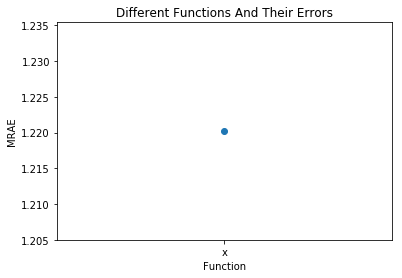

In [207]:
gp0=plt.figure()
plt.scatter(graphs[0:1],Mraes[0:1])
plt.xlabel("Function")
plt.ylabel("MRAE")
plt.title("Different Functions And Their Errors")
plt.show()
gp0.savefig('gp0')

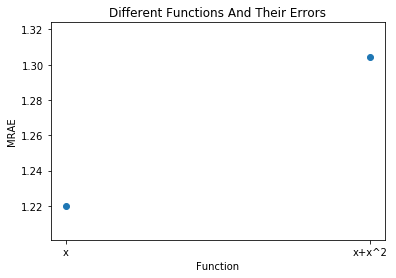

In [204]:
gp1=plt.figure()
plt.scatter(graphs[0:2],Mraes[0:2])
plt.xlabel("Function")
plt.ylabel("MRAE")
plt.title("Different Functions And Their Errors")
plt.show()
gp1.savefig('gp1')

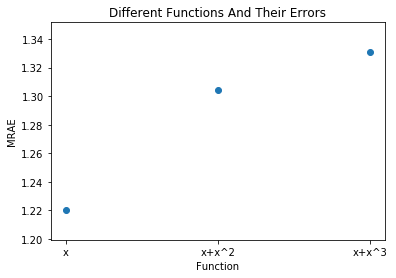

In [205]:
gp2=plt.figure()
plt.scatter(graphs[0:3],Mraes[0:3])
plt.xlabel("Function")
plt.ylabel("MRAE")
plt.title("Different Functions And Their Errors")
plt.show()
gp2.savefig('gp2')

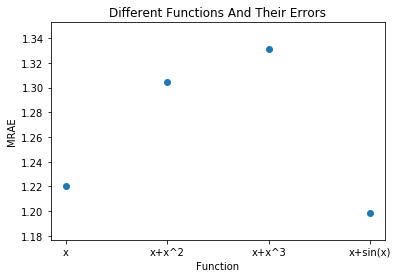

In [206]:
gp3=plt.figure()
plt.scatter(graphs[0:4],Mraes[0:4])
plt.xlabel("Function")
plt.ylabel("MRAE")
plt.title("Different Functions And Their Errors")
plt.show()
gp3.savefig('gp3')

/home/donald/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys


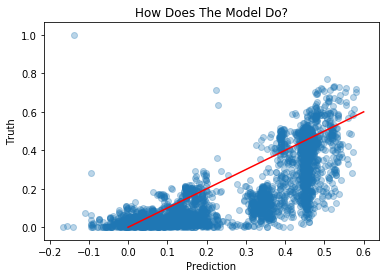

In [203]:
Ytest = test[:,len(test[1,])-1]
Xtest = test[:,0:81]
newerdum = np.ones(len(Xtest)).T
Xtest = (Xtest - Xtest.min(0))/(Xtest.max(0) - Xtest.min(0))
Ytest = (Ytest - Ytest.min(0))/(Ytest.max(0) - Ytest.min(0))
Phitest = np.column_stack((newerdum,Xtest,np.sin(Xtest)))
MRAE = np.median(np.absolute(Ytest - Phitest@w)/np.absolute(Ytest))
y = plt.figure()
plt.scatter(Phitest.dot(w),Ytest, alpha = .3)
plt.plot(np.linspace(0,.6,10),np.linspace(0,.6,10), color = "red")
plt.xlabel("Prediction")
plt.ylabel("Truth")
plt.title("How Does The Model Do?")
plt.show()
y.savefig('y')